<a href="https://colab.research.google.com/github/pranayDgr8/Computer-Vision-Implementations/blob/main/Thresholding_HCCV_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB2:THRESHOLDING**

---


Pranaydeep Mayank 19BAI1026

In [ ]:
import os
import cv2

import numpy as np
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_path = "/content/drive/MyDrive/brain MRI/yes/Y104.jpg"
image = cv2.imread(img_path)
print("width: {} pixels".format(image.shape[1]))
print("height: {} pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))
dim=(500,590)
image=cv2.resize(image, dim)

width: 700 pixels
height: 890 pixels
channels: 3


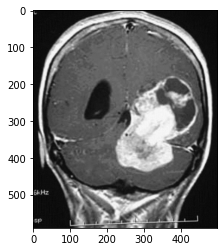

In [ ]:
plt.imshow(image)

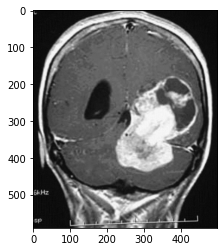

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY, 0.7)
plt.imshow(image)

## **SIMPLE THRESHOLDING**

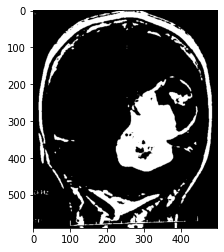

In [ ]:
(T, thresh) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)#threshold val=155
plt.imshow(thresh,cmap='gray')

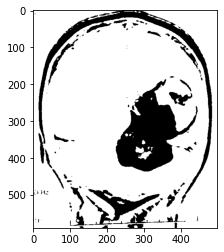

In [ ]:
(T, threshInv) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY_INV)           #inverse thresholding
plt.imshow(threshInv,cmap='gray')

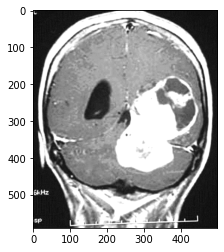

In [ ]:
(T, threshtrnc) = cv2.threshold(gray, 155, 255, cv2.THRESH_TRUNC)           
plt.imshow(threshtrnc,cmap='gray')

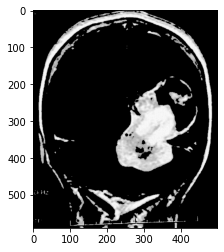

In [ ]:
(T, thresh2zero) = cv2.threshold(gray, 155, 255, cv2.THRESH_TOZERO)           
plt.imshow(thresh2zero,cmap='gray')

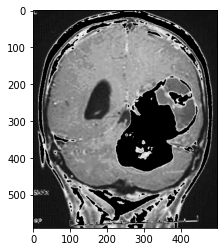

In [ ]:
(T, thresh2zero_inv) = cv2.threshold(gray, 155, 255, cv2.THRESH_TOZERO_INV)           
plt.imshow(thresh2zero_inv,cmap='gray')

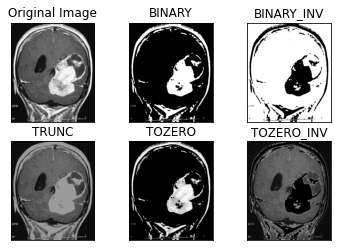

In [ ]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [image, thresh, threshInv, threshtrnc, thresh2zero, thresh2zero_inv]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## **ADAPTIVE THRESHOLDING**

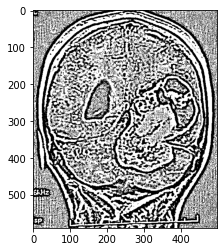

In [ ]:
th2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(th2,cmap='gray')


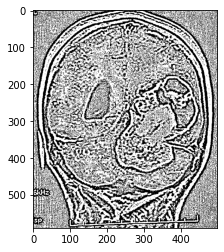

In [ ]:
th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(th3,cmap='gray')

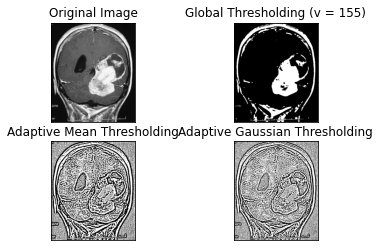

In [ ]:
titles = ['Original Image', 'Global Thresholding (v = 155)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [image, thresh, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## **OTSU BINARIZATION**

In [ ]:
# global thresholding
ret1,th1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(gray,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

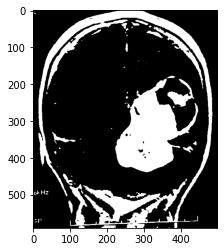

In [ ]:
plt.imshow(th1,cmap='gray')

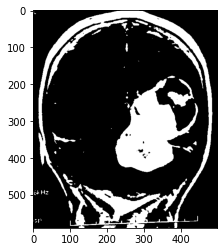

In [ ]:
plt.imshow(th2,cmap='gray')

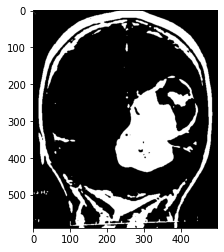

In [ ]:
plt.imshow(th3,cmap='gray')

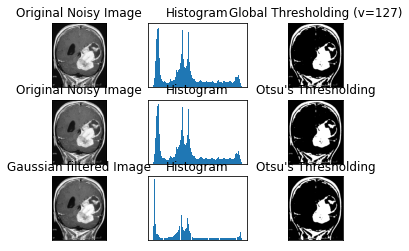

In [ ]:
# plot all the images and their histograms
images = [image, 0, th1,
          image, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()